# **Load the dataset**




In [1]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test)= fashion_mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

# **Preprocess the date**

In [2]:
# Scale pixel valeus to 0-1
x_train=x_train/255
x_test=x_test/255
# Reshape for CNN
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

# **Build a CNN model**

In [3]:
#create a sequential model
from tensorflow.keras import models, layers
model=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10,activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **Compile the modele**

In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# **Train the model**



In [5]:
history=model.fit(x_train,y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.7743 - loss: 0.6298 - val_accuracy: 0.8685 - val_loss: 0.3566
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8822 - loss: 0.3224 - val_accuracy: 0.8903 - val_loss: 0.3052
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9019 - loss: 0.2693 - val_accuracy: 0.9068 - val_loss: 0.2654
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9106 - loss: 0.2384 - val_accuracy: 0.9110 - val_loss: 0.2445
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9224 - loss: 0.2067 - val_accuracy: 0.9150 - val_loss: 0.2327
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9315 - loss: 0.1820 - val_accuracy: 0.9070 - val_loss: 0.2521
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9412 - loss: 0.1559 - val_accuracy: 0.9122 - val_loss: 0.2645
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9479 - loss: 0.1404 -

# **Evaluate the model**

In [6]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9042 - loss: 0.3237


[0.30565446615219116, 0.9060999751091003]

# **Plot performance curves**

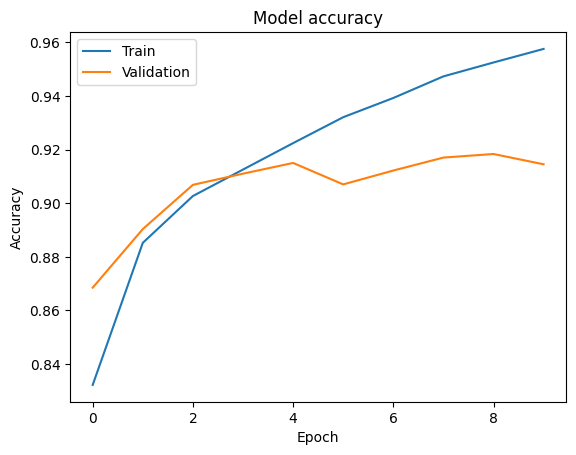

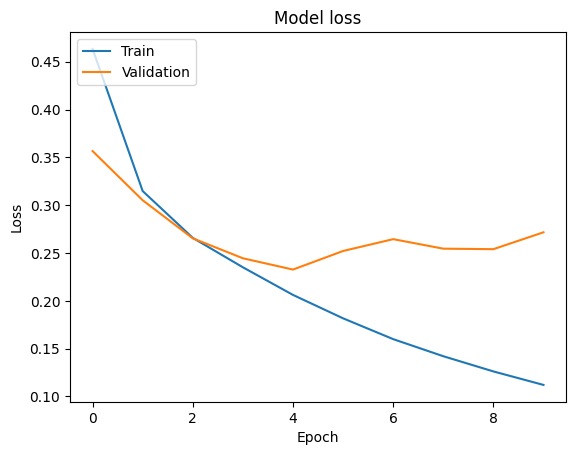

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# **Predict on new images**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicte: Ankle boot


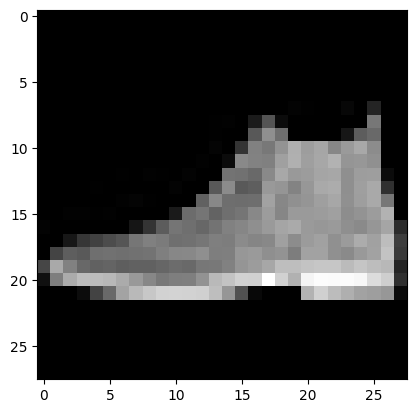

In [12]:
import numpy as np
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

index =0
image= x_test[index].reshape(28,28)
prediction=np.argmax(model.predict(x_test[index].reshape(1,28,28,1)))
print("Predicte:", class_names[prediction])
plt.imshow(image, cmap='gray')
plt.show()

# **Build a confusion matrix**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


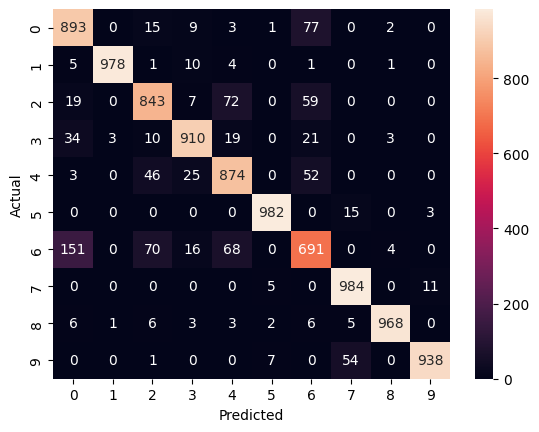

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred=np.argmax(model.predict(x_test),axis=1)
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()